This should be a link to a github repo, but ok.

There's a lot going on in this notebook. The technical realisation is ok,  but I missing a clear description of the steps you have taken and an explanation why you have taken these. You also make a lot of interesting and accurate visualisations, but fail to deliver an interpretation and (sub)conclusions based on them.

You should add these textual addition to the notebook and resubmit your work.

In [32]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing

import seaborn as sns


The scope of this assignment is supervised learning. Your job is to build a model. You can submit your work in a notebook. Make sure that you motivate your choices in the notebook. No motivation will lead to an insufficient grade. 

Choose one of the following articles or use your own dataset generated by this semester research project.

I chose V

Dysphonic Voice Pattern Analysis of Patients in Parkinson's Disease Using Minimum Interclass Probability Risk Feature Selection and Bagging Ensemble Learning Method
Dataset Link: http://archive.ics.uci.edu/ml/datasets/Parkinsons
Research Paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5434464/

I chose ^

Distinguish between hard sweeps, soft sweeps on a single standing variant, regions linked to sweeps (or the "shoulders" of sweeps), and regions evolving neutrally. Explanation of method and data generation is to be found at https://journals.plos.org/plosgenetics/article?id=10.1371/journal.pgen.1005928

Load, inspect and clean the data. Split the data into a training set and a validation set and a test set. Use a simple classifier as a baseline. Train various classifiers. Motivate your choice in relation to the characteristics of the dataset. Try to combine them into an ensemble learning model that outperforms all of the others. Please see the attached excel-file for the specific grading matrix.

In [33]:
Assessment_matrix = pd.read_excel("assessment_matrix.xlsx")
Assessment_matrix

Unnamed: 0                              Unnamed: 1  \
0     Conduct critical research  critical evaluation and justification    
1                           NaN             evaluate obtained solutions   
2  Model meaningful information                         Quality of work   
3      Communicate effectively     Active and effectively communication   
4   Deliver organised solutions                    code repository and    

                   Insiufficient  \
0  Less than required Fair level   
1  Less than required Fair level   
2  Less than required Fair level   
3  Less than required Fair level   
4  Less than required Fair level   

                                                Fair  \
0  Adequate use of research and design methodolog...   
1  Findings are treated as straightforward and un...   
2  Results are related to the topic, extracted fr...   
3  Sufficient interaction with peers and superiors.    
4  Coding style guide is not followed or code is ...   

                                                Good  \
0  Use of the right research and design methodolo...   
1  Good interpretation and verification of the re...   
2  Results from correct analysis and of (incomple...   
3  Good interaction with peers and superiors. Com...   
4  Code according to coding style and easy to rea...   

                                         Excellent    
0  Excellent and critical use of research and des...  
1  Detailed interpretation and verification of th...  
2  Results are extracted from correct analysis of...  
3  Outstanding interaction with peers and superio...  
4  Code according coding style. Exceptionally eas...

Attribute Information:

Matrix column entries (attributes):
name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer, 
MDVP:Shimmer(dB), 
Shimmer:APQ3, 
Shimmer:APQ5, 
MDVP:APQ, 
Shimmer:DDA - Several measures of variation in amplitude

NHR, HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE, D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1, spread2, PPE - Three nonlinear measures of fundamental frequency variation 

In [34]:
data = pd.read_csv("parkinsons.data")

In [35]:
data.isnull().values.any()

False

There are no NaN values in the dataframe

In [36]:
data

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0             0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1             0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2             0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3             0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4             0.00011   0.00655   0.00908     0.01966       0.06425  ...   
..                ...       ...       ...         ...           ...  ...   
190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0        0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1        0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2        0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3        0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4        0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
..           ...      ...     ...     ...       ...       ...       ...   
190      0.07008  0.02764  19.517       0  0.448439  0.657899 -6.538586   
191      0.04812  0.01810  19.147       0  0.431674  0.683244 -6.195325   
192      0.03804  0.10715  17.883       0  0.407567  0.655683 -6.787197   
193      0.03794  0.07223  19.020       0  0.451221  0.643956 -6.744577   
194      0.03078  0.04398  21.209       0  0.462803  0.664357 -5.724056   

      spread2        D2       PPE  
0    0.266482  2.301442  0.284654  
1    0.335590  2.486855  0.368674  
2    0.311173  2.342259  0.332634  
3    0.334147  2.405554  0.368975  
4    0.234513  2.332180  0.410335  
..        ...       ...       ...  
190  0.121952  2.657476  0.133050  
191  0.129303  2.784312  0.168895  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[195 rows x 24 columns]

In [37]:
data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [38]:
data["status"] = data["status"].astype(float)

In [39]:
data.shape

(195, 24)

In [40]:
healthy, parkinson = data["status"].value_counts()

In [41]:
print("healthy:", healthy, round(100/len(data)*healthy, 2), "%", "\n", "parkinson:", parkinson, round(100/len(data)*parkinson, 2), "%")

healthy: 147 75.38 % 
 parkinson: 48 24.62 %


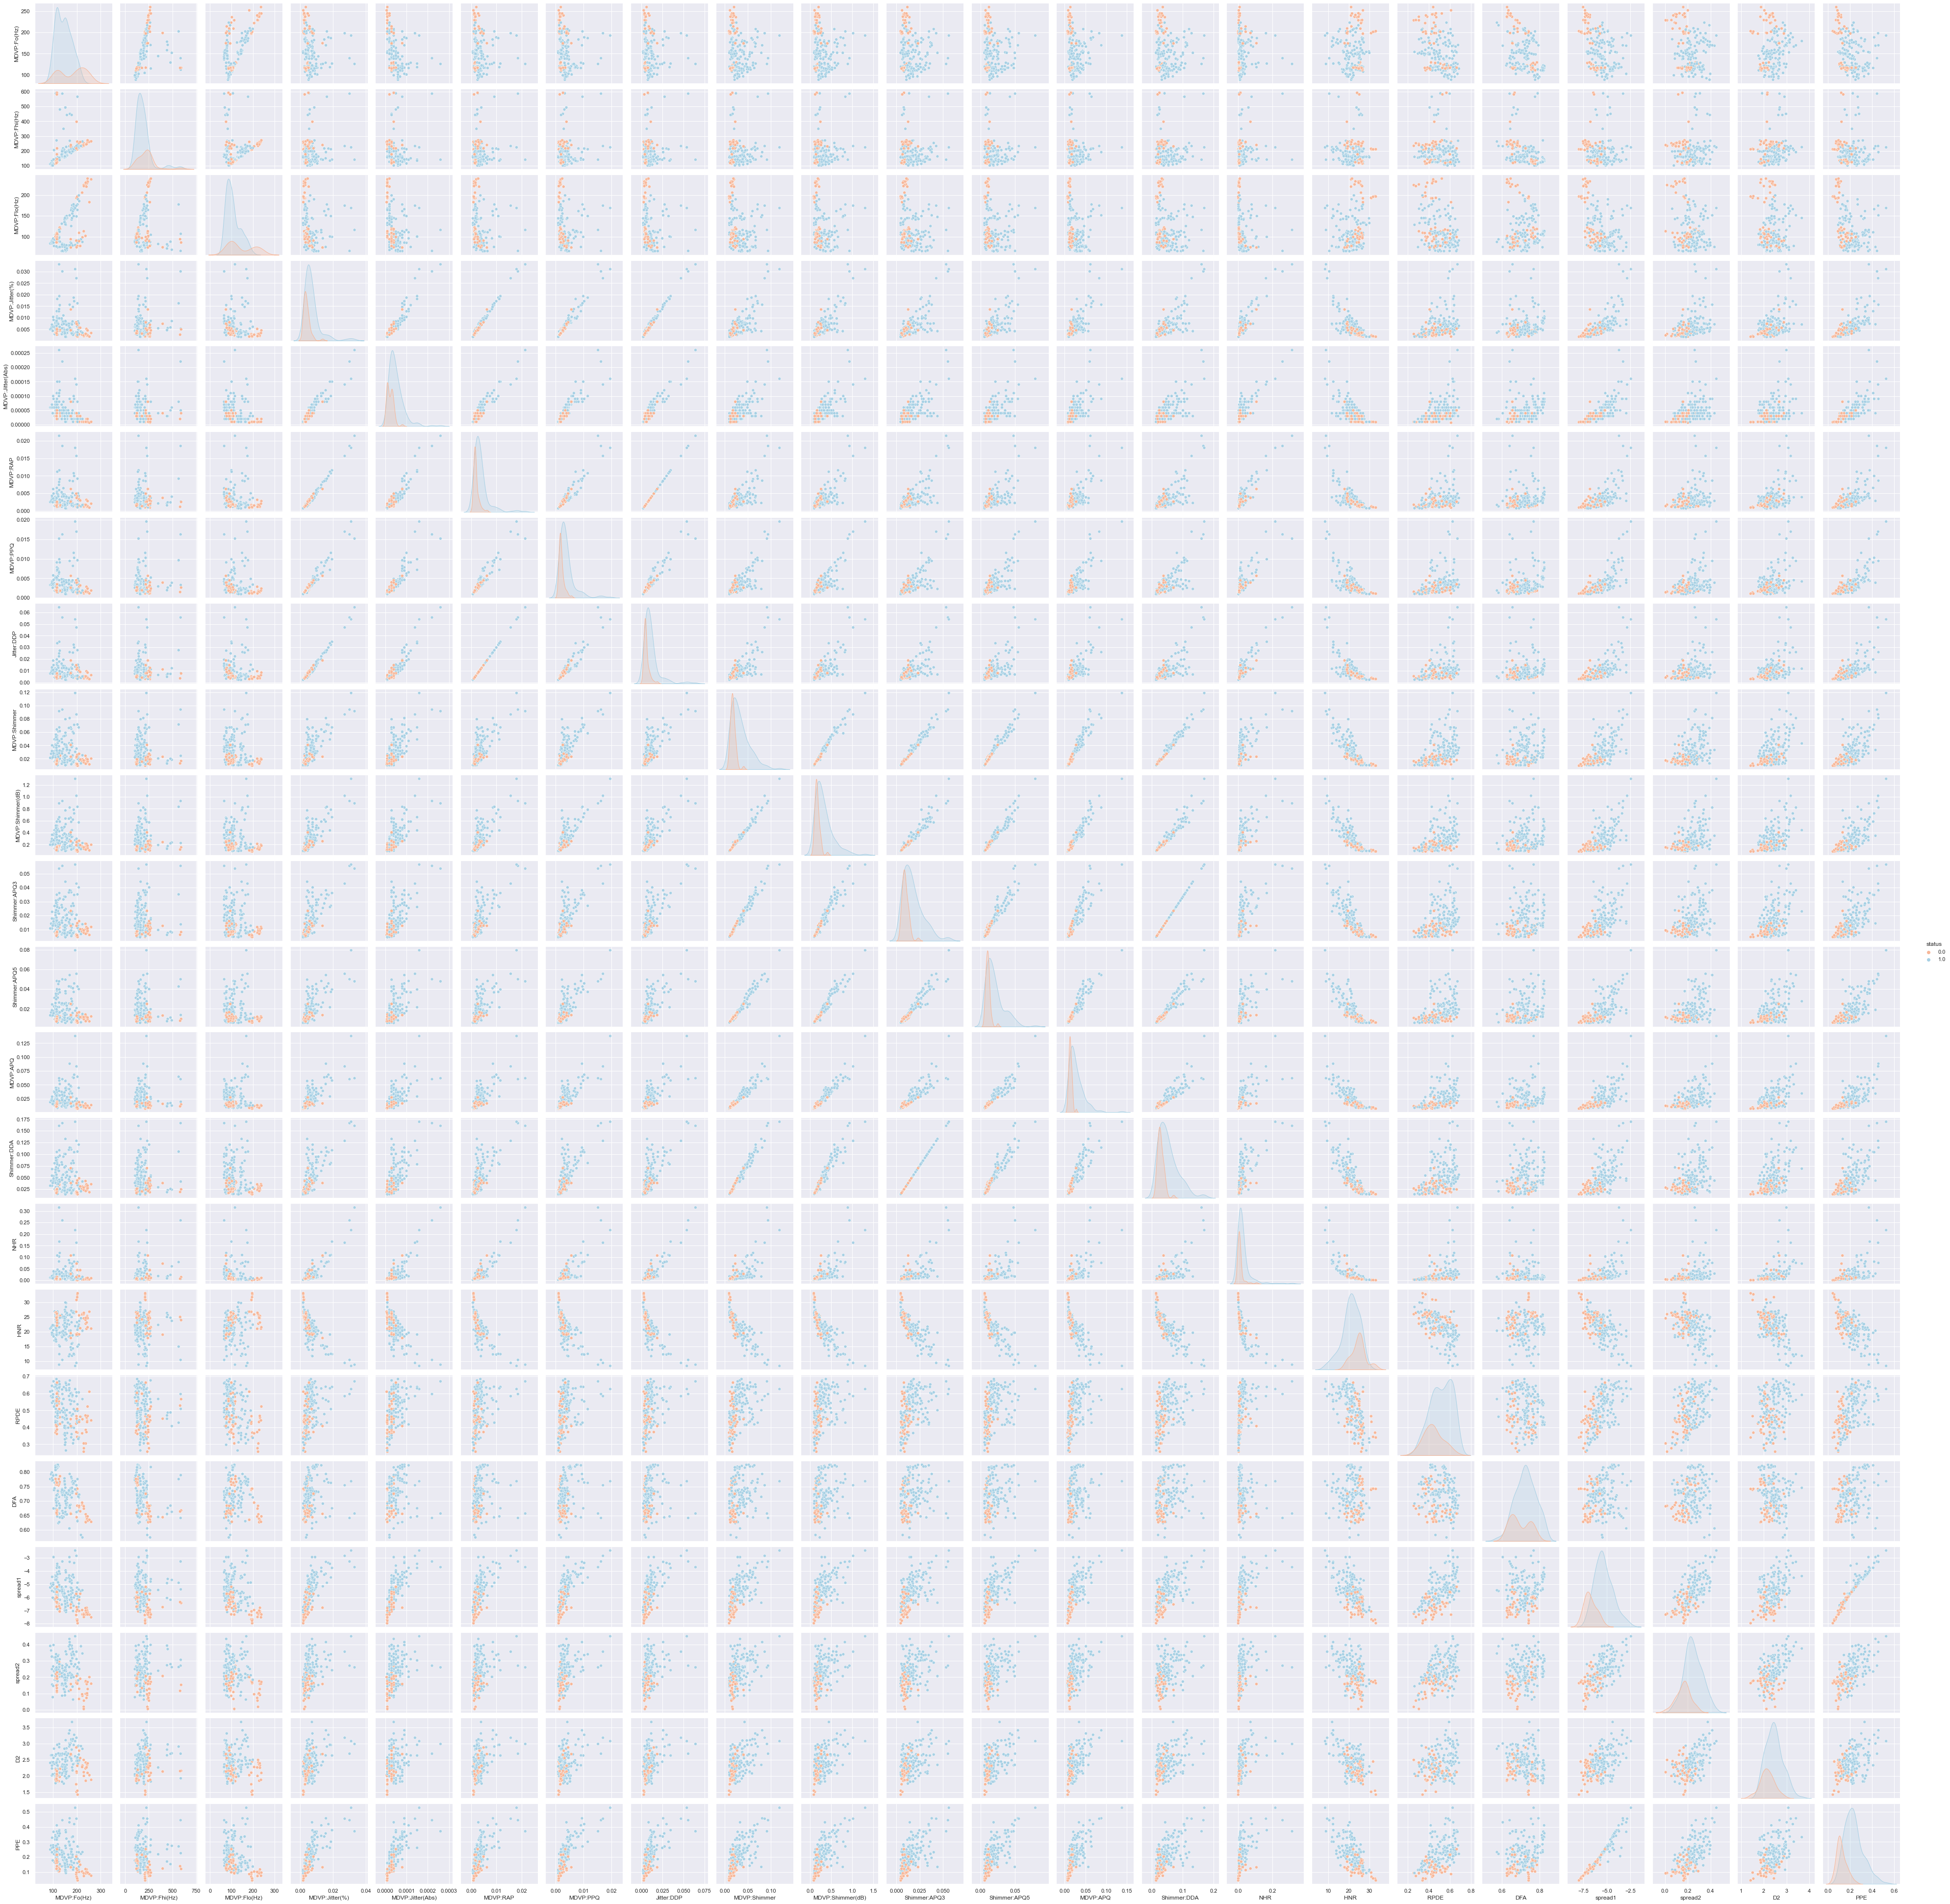

In [42]:
sns.pairplot(data=data[data.columns.values], hue='status', palette='RdBu')
#plt.savefig("pairplot.png")

The plot above shows pairplots between every column and every other column. there are 2 collor dots representing Healthy(Blue) and parkinson(Orange) patients. the plot shows that in most pairs the parkinson dots cluster together, meaning that if a patient has a dot in these clusters, the change of having parkinson is higher than if its not in this cluster.

In [43]:
#correlation between collumns in the dataset
data[data.columns.values].corr()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682     -0.009997     -0.101095        0.725561   
MDVP:APQ            -0.077774      0.004937     -0.107293        0.758255   
Shimmer:DDA         -0.094732     -0.003733     -0.150737        0.746635   
NHR                 -0.021981      0.163766     -0.108670        0.906959   
HNR                  0.059144     -0.024893      0.210851       -0.728165   
status              -0.383535     -0.166136     -0.380200        0.278220   
RPDE                -0.383894     -0.112404     -0.400143        0.360673   
DFA                 -0.446013     -0.343097     -0.050406        0.098572   
spread1             -0.413738     -0.076658     -0.394857        0.693577   
spread2             -0.249450     -0.002954     -0.243829        0.385123   
D2                   0.177980      0.176323     -0.100629        0.433434   
PPE                 -0.372356     -0.069543     -0.340071        0.721543   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
MDVP:Fo(Hz)              -0.382027 -0.076194 -0.112165   -0.076213   
MDVP:Fhi(Hz)             -0.029198  0.097177  0.091126    0.097150   
MDVP:Flo(Hz)             -0.277815 -0.100519 -0.095828   -0.100488   
MDVP:Jitter(%)            0.935714  0.990276  0.974256    0.990276   
MDVP:Jitter(Abs)          1.000000  0.922911  0.897778    0.922913   
MDVP:RAP                  0.922911  1.000000  0.957317    1.000000   
MDVP:PPQ                  0.897778  0.957317  1.000000    0.957319   
Jitter:DDP                0.922913  1.000000  0.957319    1.000000   
MDVP:Shimmer              0.703322  0.759581  0.797826    0.759555   
MDVP:Shimmer(dB)          0.716601  0.790652  0.839239    0.790621   
Shimmer:APQ3              0.697153  0.744912  0.763580    0.744894   
Shimmer:APQ5              0.648961  0.709927  0.786780    0.709907   
MDVP:APQ                  0.648793  0.737455  0.804139    0.737439   
Shimmer:DDA               0.697170  0.744919  0.763592    0.744901   
NHR                       0.834972  0.919521  0.844604    0.919548   
HNR                      -0.656810 -0.721543 -0.731510   -0.721494   
status                    0.338653  0.266668  0.288698    0.266646   
RPDE                      0.441839  0.342140  0.333274    0.342079   
DFA                       0.175036  0.064083  0.196301    0.064026   
spread1                   0.735779  0.648328  0.716489    0.648328   
spread2                   0.388543  0.324407  0.407605    0.324377   
D2                        0.310694  0.426605  0.412524    0.426556   
PPE                       0.748162  0.670999  0.769647    0.671005   

                  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  Shimmer:DDA       NHR  \
MDVP:Fo(Hz)          -0.098374         -0.073742  ...    -0.094732 -0.021981   
MDVP:Fhi(Hz)          0.002281          0.043465  ...    -0.003733  0.163766   
MDVP:Flo(Hz)         -0.144543         -0.119089  ...    -0.150737 -0.108670   
MDVP:Jitter(%)        0.769063          0.804289  ...     0.746635  0.906959   
MDVP:Jitter(Abs)      0.703322          0.716601  ...     0.697170  0.834972   
MDVP:RAP

<AxesSubplot:>

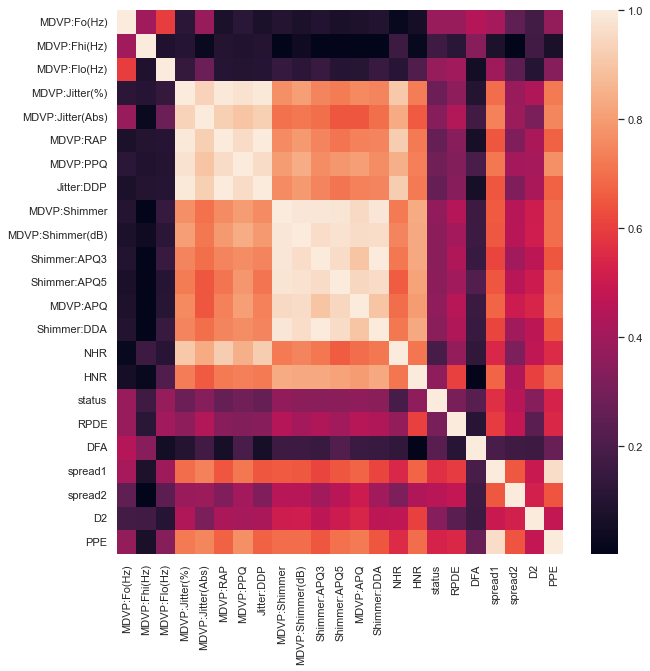

In [44]:
#heatmap of the correlation between collumns of the matrix
cor = data[data.columns.values].corr().abs()
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(cor)

where collumns have a high correlation above eachother. 
Such as seen in MDCP:Jitter(%) untill Jitter:DDP. it means that these collumns have a high correlation and we can remove all but one since this one will represent the others as well.

In [45]:
#making dict of what collumns to use.
cols = ["MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "MDVP:Flo(Hz)", "MDVP:Jitter(%)", "MDVP:Shimmer", "NHR", "HNR", "RPDE", "DFA", "spread1", "spread2", "D2", "PPE"]

In [46]:
#fill X matric and the y vector
y = np.array(data["status"])
X = np.array(data[cols])

X.shape

(195, 13)

In [47]:
#normalizing the X
from sklearn.preprocessing import StandardScaler

def normalize(X):
    scalar = StandardScaler()
    scalar = scalar.fit(X)
    X = scalar.transform(X)
    return X

X = normalize(X)

In [48]:
from sklearn.model_selection import train_test_split, ShuffleSplit
#split the set into 2 groups, Training and Test/Validation
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)


In [49]:
# function to evaluate models
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

def evaluate(y_test, y_pred, X_test, clf):
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification report")
    print(classification_report(y_test, y_pred))
    
def plot_learning_curves(model, X_train, y_train, X_val, y_val):
    """
    input:
        model:pipeline object
        X_train, y_train: training data
        X_val, y_val: test data
    """
    train_errors, val_errors = [], []
    for m in range(30, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=1, label="training data")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=1, label="validation data")
    plt.legend(loc="upper right", fontsize=10)   
    plt.xlabel("Training set size", fontsize=10) 
    plt.ylabel("RMSE", fontsize=10)     
    # compare accuracy train versus test to access overfit 
    print(f'test  acc: {model.score(X_val, y_val)}')
    print(f'train acc: {model.score(X_train, y_train)}')

In [50]:
#training the LogisticRegression model
from sklearn.linear_model import LogisticRegression

Lg = LogisticRegression()
Lg.fit(X_train, y_train)

LogisticRegression()

the LogisticRegression model can be used to describe the data and the relation between one dependent binary variable(Healthy or parkinson), and one or more independent variables(The measured data)

In [51]:
#evaluation the model
y_pred = Lg.predict(X_test)
evaluate(y_test, y_pred, X_test, Lg)

Confusion matrix:
[[ 8  7]
 [ 5 39]]
Classification report
              precision    recall  f1-score   support

         0.0       0.62      0.53      0.57        15
         1.0       0.85      0.89      0.87        44

    accuracy                           0.80        59
   macro avg       0.73      0.71      0.72        59
weighted avg       0.79      0.80      0.79        59



the confusion matrix shows the model predicted 8 correct healthy patients(top-left). 7 false positives(top-right). 5 false negatives(bottem-left). and 39 true positives(bottem-right).

The classification report shows a precision of 0.62 for healthy predictions and 0.85 for parkinson predictions. for the predicted values.
the recall is calculated with respect to the actual values in the dataset. these are 0.53 and 0.89.
f1 is the harmonic mean of the precision and recall. these are calculated to be 0.57 and 0.87

test  acc: 0.7966101694915254
train acc: 0.875


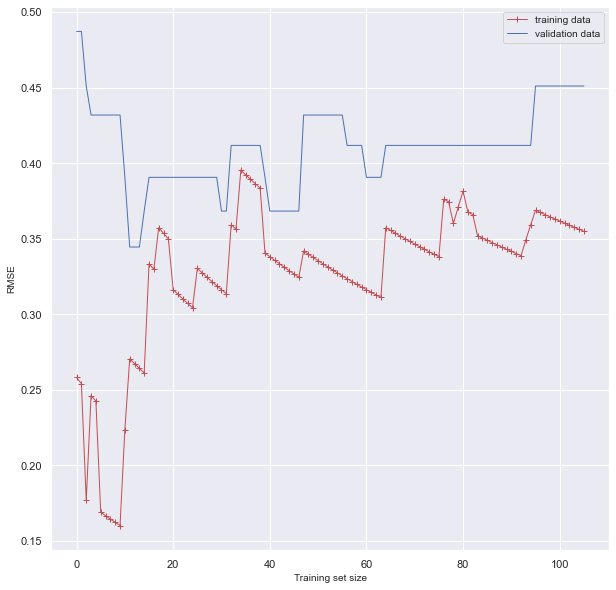

In [52]:
plot_learning_curves(Lg, X_train, y_train, X_test, y_test)

RMSE(R squared mean error)
At a set size of 34, the RMSE of the training and validation are lowest. This means a set size of 34 would be best. higher sizes would over fit the data.
the training set has an accuracy of 89% and the test set has 81%. this means that the model has a good accuracy. 

Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

A Decision Tree Classifier was made because this model predicts the value of the target by learning simple decision rules inferred from the data features.

In [54]:
y_pred = dtc.predict(X_test)
evaluate(y_test, y_pred, X_test, dtc)

Confusion matrix:
[[14  1]
 [ 5 39]]
Classification report
              precision    recall  f1-score   support

         0.0       0.74      0.93      0.82        15
         1.0       0.97      0.89      0.93        44

    accuracy                           0.90        59
   macro avg       0.86      0.91      0.88        59
weighted avg       0.91      0.90      0.90        59



This model shows 14 true negatives with F1-core of 0.82 and 39 true positives with F1-score of 0.93. the model is better in predicting true positives than true negatives. 


test  acc: 0.8135593220338984
train acc: 0.9926470588235294


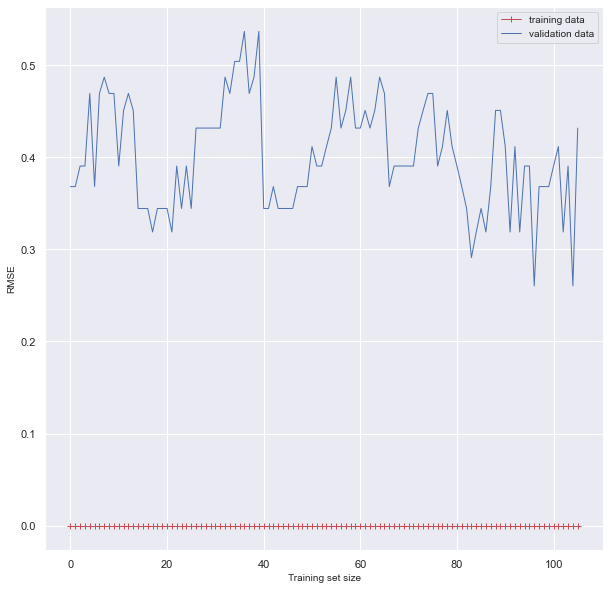

In [55]:
plot_learning_curves(dtc, X_train, y_train, X_test, y_test)

The Decision Tree model is unable to get a training and validation data set that are close in RMSE. it massifly over fitting the data.

SVM

In [56]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

SVC()

This model is maps data points to a high-dimensional space and tries to find the optimal hyperplane that devides the data into two classes.

Confusion matrix:
[[ 9  6]
 [ 0 44]]
Classification report
              precision    recall  f1-score   support

         0.0       1.00      0.60      0.75        15
         1.0       0.88      1.00      0.94        44

    accuracy                           0.90        59
   macro avg       0.94      0.80      0.84        59
weighted avg       0.91      0.90      0.89        59

test  acc: 0.8983050847457628
train acc: 0.9191176470588235


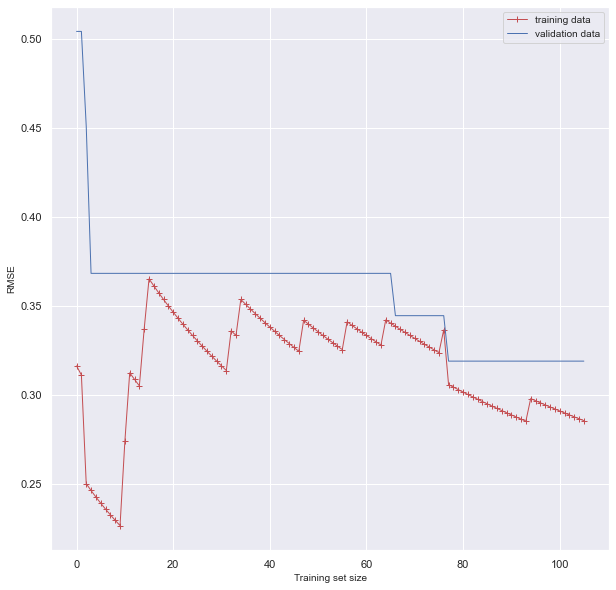

In [57]:
y_pred = svm.predict(X_test)
evaluate(y_test, y_pred, X_test, svm)
plot_learning_curves(svm, X_train, y_train, X_test, y_test)

SVM model shows that it is very capable of not under or over fitting the data if given at least a training set of 17. it has a high accuracy in the test and train data. in the confusion matrix it gave very little false-negative predictions. the F1-scores are both also high and both data sets got an accuracy of around 90%

Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

Naive Bayes Gaussian was tested. this model is very different from SVM. it assumes independence of the features. so it uses independent dimensions. 

Confusion matrix:
[[15  0]
 [12 32]]
Classification report
              precision    recall  f1-score   support

         0.0       0.56      1.00      0.71        15
         1.0       1.00      0.73      0.84        44

    accuracy                           0.80        59
   macro avg       0.78      0.86      0.78        59
weighted avg       0.89      0.80      0.81        59

test  acc: 0.7966101694915254
train acc: 0.7720588235294118


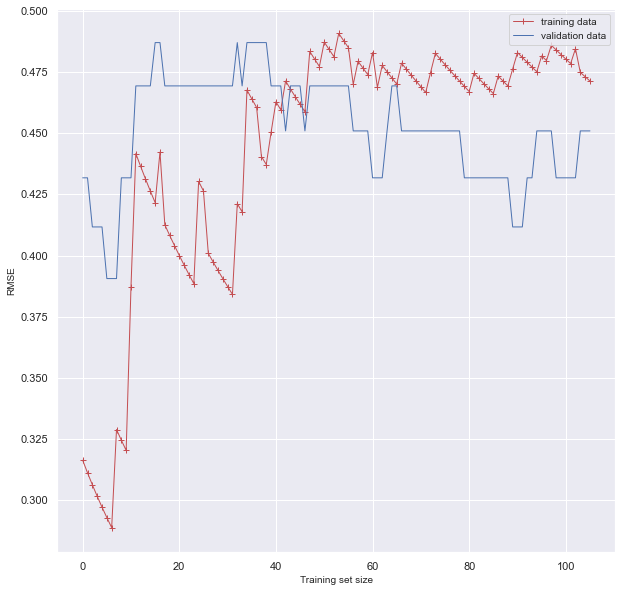

In [59]:
y_pred = gnb.predict(X_test)
evaluate(y_test, y_pred, X_test, gnb)
plot_learning_curves(gnb, X_train, y_train, X_test, y_test)

Naive Bayes shows a set size of more than 35 would be best. the RMSE of both data sets are close so there is little over fitting. this model predicted very little false-positives. The F1-scores were 0.71 and 0.84 and both data sets got an accuracy of almost 80%.

Combining this model with the SVM model could be interesting because SVM got very little false-negatives and Naive Bayes very little false-positives. together the false results might both be very low.

Ensamble learning

In [61]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

In [62]:
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

Random Forest was tested.

Confusion matrix:
[[14  1]
 [ 1 43]]
Classification report
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        15
         1.0       0.98      0.98      0.98        44

    accuracy                           0.97        59
   macro avg       0.96      0.96      0.96        59
weighted avg       0.97      0.97      0.97        59

test  acc: 0.9152542372881356
train acc: 1.0


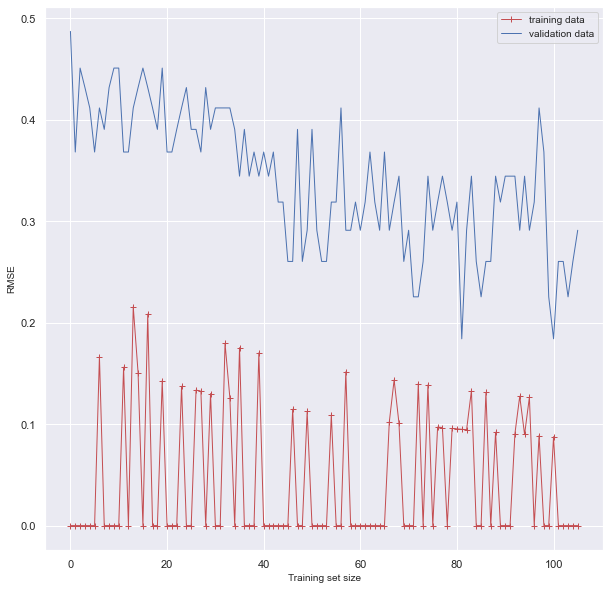

In [63]:
y_pred = rf.predict(X_test)
evaluate(y_test, y_pred, X_test, rf)
plot_learning_curves(rf, X_train, y_train, X_test, y_test)

using the random forest classifier the data was highly over fitted. the confusion matrix does show very little false predictions and the f1-scores are high just as the precision. due to the over fitting this might not be a good model to use

Bagging with decicion tree classifier

In [64]:
bg = BaggingClassifier(DecisionTreeClassifier(), max_features = 1.0, max_samples = 0.5) 
bg.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5)

Confusion matrix:
[[12  3]
 [ 3 41]]
Classification report
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80        15
         1.0       0.93      0.93      0.93        44

    accuracy                           0.90        59
   macro avg       0.87      0.87      0.87        59
weighted avg       0.90      0.90      0.90        59

test  acc: 0.847457627118644
train acc: 0.9558823529411765


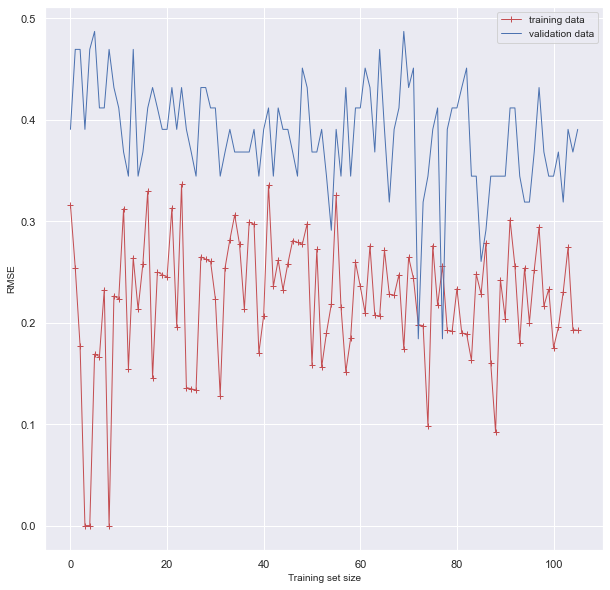

In [65]:
y_pred = bg.predict(X_test)
evaluate(y_test, y_pred, X_test, bg)
plot_learning_curves(bg, X_train, y_train, X_test, y_test)

Using Bagging with decicion tree classifier, there was a lot of variance in the RMSE between set sizes. overal there was a lot of over fitting. The model does have a high F1 score and high accuracy for both data sets.

Boosting

In [66]:
adb = AdaBoostClassifier(LogisticRegression(), n_estimators = 10, learning_rate = 1)
adb.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=1,
                   n_estimators=10)

Confusion matrix:
[[ 8  7]
 [ 5 39]]
Classification report
              precision    recall  f1-score   support

         0.0       0.62      0.53      0.57        15
         1.0       0.85      0.89      0.87        44

    accuracy                           0.80        59
   macro avg       0.73      0.71      0.72        59
weighted avg       0.79      0.80      0.79        59

test  acc: 0.7966101694915254
train acc: 0.8676470588235294


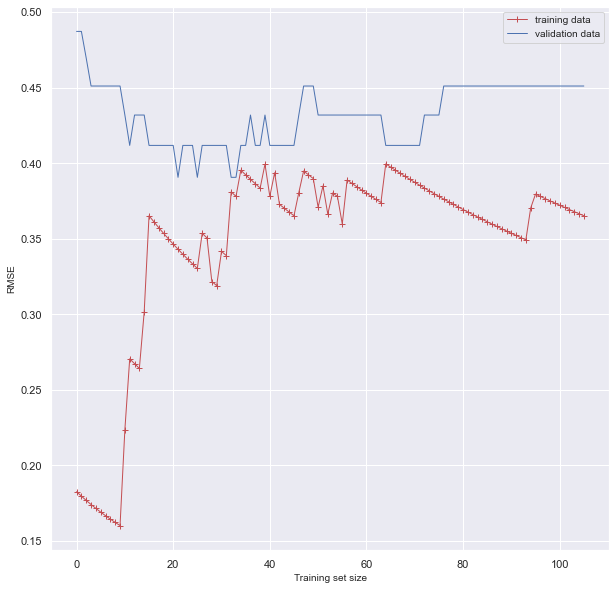

In [67]:
y_pred = adb.predict(X_test)
evaluate(y_test, y_pred, X_test, adb)
plot_learning_curves(adb, X_train, y_train, X_test, y_test)

With Boosting, data sets between 30 and 45 have little over fitting. The model has low F1 scores. the accuracy was around 82%. therefor it will not be used further

Stacking
Using the best models found before.
svm and gnb were chosen to be the best models and are stacked

In [68]:
from sklearn.ensemble import StackingClassifier
estimators = [("svm", svm), ("gnb", gnb)]
sclf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
sclf.fit(X_train, y_train)

StackingClassifier(estimators=[('svm', SVC()), ('gnb', GaussianNB())],
                   final_estimator=LogisticRegression())

Confusion matrix:
[[ 9  6]
 [ 0 44]]
Classification report
              precision    recall  f1-score   support

         0.0       1.00      0.60      0.75        15
         1.0       0.88      1.00      0.94        44

    accuracy                           0.90        59
   macro avg       0.94      0.80      0.84        59
weighted avg       0.91      0.90      0.89        59



C:\Users\Pin\anaconda3\envs\inv2\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Pin\anaconda3\envs\inv2\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Pin\anaconda3\envs\inv2\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Pin\anaconda3\envs\inv2\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


test  acc: 0.8983050847457628
train acc: 0.9117647058823529


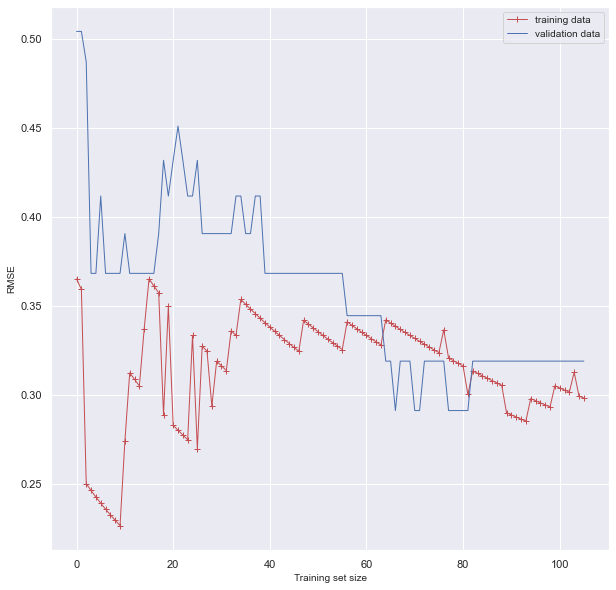

In [69]:
y_pred = sclf.predict(X_test)
evaluate(y_test, y_pred, X_test, sclf)
plot_learning_curves(sclf, X_train, y_train, X_test, y_test)

Stacking gives a set size above 55 to have little over fitting. The model has a high F1-score and high accuracy. there were no false-negatives and low false-positives.

Gradient Boosting

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(random_state=0)
grad.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

this model allows for optimization of arbitary differentiable loss functions. 

Confusion matrix:
[[13  2]
 [ 1 43]]
Classification report
              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90        15
         1.0       0.96      0.98      0.97        44

    accuracy                           0.95        59
   macro avg       0.94      0.92      0.93        59
weighted avg       0.95      0.95      0.95        59

test  acc: 0.9491525423728814
train acc: 1.0


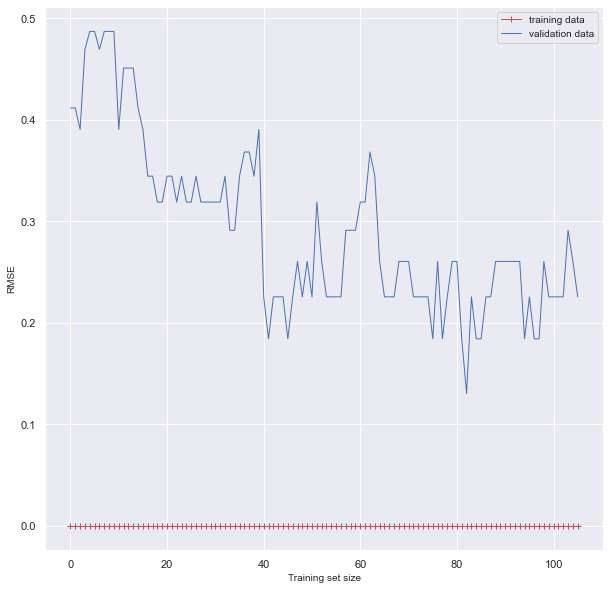

In [71]:
y_pred = grad.predict(X_test)
evaluate(y_test, y_pred, X_test, grad)
plot_learning_curves(grad, X_train, y_train, X_test, y_test)

gradient boosting gave high F1-scores and high accuracy for both data sets. but it has massive over fitting and will therefor not be used further.

Voting classifier

In [72]:
evc = VotingClassifier(estimators = [("gnb",gnb), ("svm", svm)], voting = "hard")
evc.fit(X_train, y_train)

VotingClassifier(estimators=[('gnb', GaussianNB()), ('svm', SVC())])

In [ ]:
Voting classifier trains on an ensamble of numerous models and predicts an output based on the highest probability.

Confusion matrix:
[[15  0]
 [12 32]]
Classification report
              precision    recall  f1-score   support

         0.0       0.56      1.00      0.71        15
         1.0       1.00      0.73      0.84        44

    accuracy                           0.80        59
   macro avg       0.78      0.86      0.78        59
weighted avg       0.89      0.80      0.81        59

test  acc: 0.7966101694915254
train acc: 0.7867647058823529


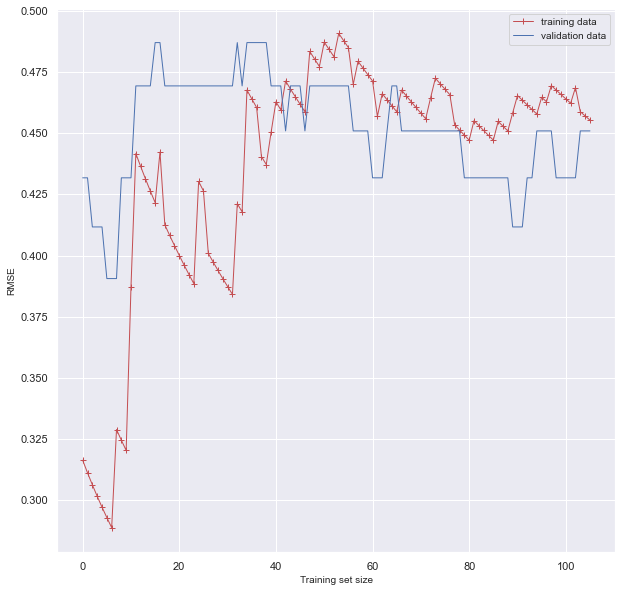

In [73]:
y_pred = evc.predict(X_test)
evaluate(y_test, y_pred, X_test, evc)
plot_learning_curves(evc, X_train, y_train, X_test, y_test)

voting classifier has very little over fitting at set sizes above 35. the F1-scores are high but the accuracy on false-negatives is very low. therefor this model is not the best model to use.

After trying all these models, the best model is the stacking model using svm and gnb. given a large enough training set it can accuratly determine if a patient has parkinson. its weak side it false-positives but this is less of a negative than false-negatives. its accuracy is equal to that of just the SVM model. but the RMSE score for the stacking model improves at larger training sets. this could enable the model to improve if more data is provided.